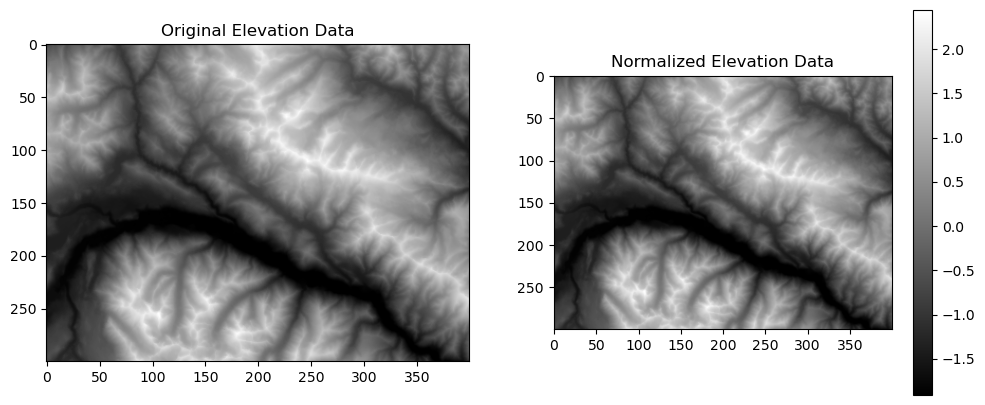

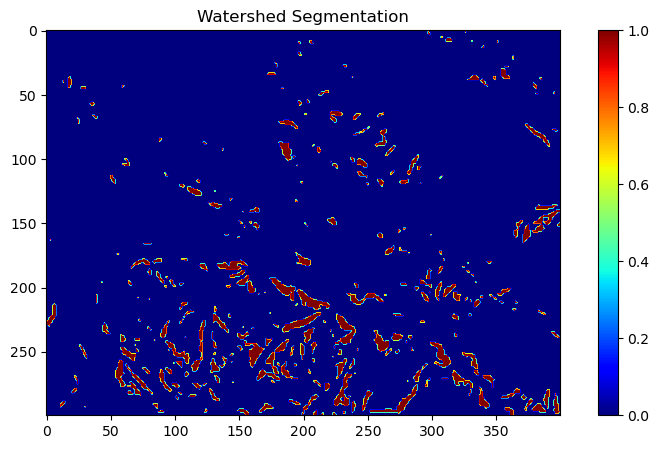

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load elevation data
elev = np.load("C:\Repos\Personal_Repos\MLGeoscience\Machine-Learning-Interview\Data\elev_m.npy")

# Display the original elevation data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(elev, cmap='gray')
plt.title('Original Elevation Data')

# Z-score normalization
elev_mean = np.mean(elev)
elev_std = np.std(elev)
elev_normalized = (elev - elev_mean) / elev_std

# Display the normalized elevation data
plt.subplot(1, 2, 2)
plt.imshow(elev_normalized, cmap='gray')
plt.title('Normalized Elevation Data')
plt.colorbar()
plt.show()

# Apply Gaussian smoothing to the normalized data
elev_smoothed = gaussian_filter(elev_normalized, sigma=1.0)

# Compute the gradient of the smoothed data
gradient = np.gradient(elev_smoothed)[0]**2 + np.gradient(elev_smoothed)[1]**2

# Apply a threshold to the gradient to find markers
markers = gradient > np.percentile(gradient, 95)  # Example threshold, adjust as needed

# Apply Watershed segmentation

# Display the segmentation result
plt.figure(figsize=(10, 5))
plt.imshow(markers, cmap='jet')
plt.title('Watershed Segmentation')
plt.colorbar()
plt.show()


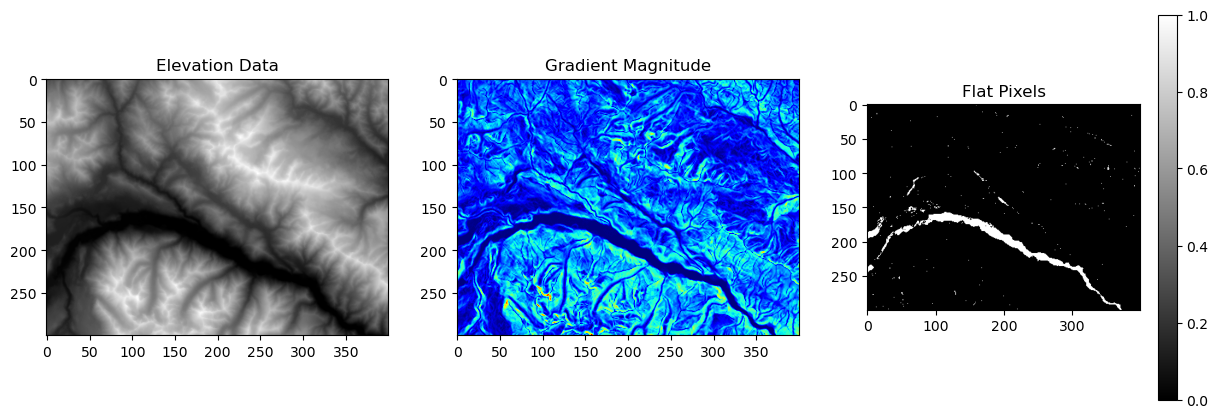

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load elevation data

# Compute gradient in x and y directions
grad_x, grad_y = np.gradient(elev)

# Compute gradient magnitude
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Define a threshold for flatness (e.g., 1% of the max gradient magnitude)
threshold = 0.01 * np.max(grad_magnitude)

# Find flat pixels: gradient magnitude below the threshold
flat_pixels = grad_magnitude < threshold

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(elev, cmap='gray')
plt.title('Elevation Data')

plt.subplot(1, 3, 2)
plt.imshow(grad_magnitude, cmap='jet')
plt.title('Gradient Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(flat_pixels, cmap='gray')
plt.title('Flat Pixels')
plt.colorbar()
plt.show()


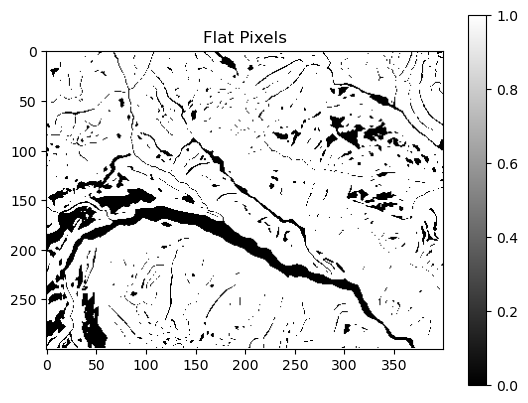

In [7]:
gradient = np.gradient(elev_smoothed)[0]**2+np.gradient(elev_smoothed)[1]**2
marker= np.zeros_like(elev)
marker[gradient > 0.01*np.max(gradient)] =1
plt.imshow(marker, cmap='gray')
plt.title('Flat Pixels')
plt.colorbar()
plt.show()